# Python Sentiment Analysis Project with NLTK and Transformers. Classify Amazon Reviews!!


This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
#Read file

df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
print("Shape of the data is", df.shape)

Shape of the data is (568454, 10)


In [5]:
##Lets build sentimental analysis on 1st 1000 records 

df = df.head(1000)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
print("Shape of the data is", df.shape)

Shape of the data is (1000, 10)


# EDA

In [7]:
#Score is imporant factor lets check on that

df["Score"].value_counts()

Score
5    642
4    138
1     98
3     75
2     47
Name: count, dtype: int64

In [8]:
##lers sor it 
df["Score"].value_counts().sort_index()


Score
1     98
2     47
3     75
4    138
5    642
Name: count, dtype: int64

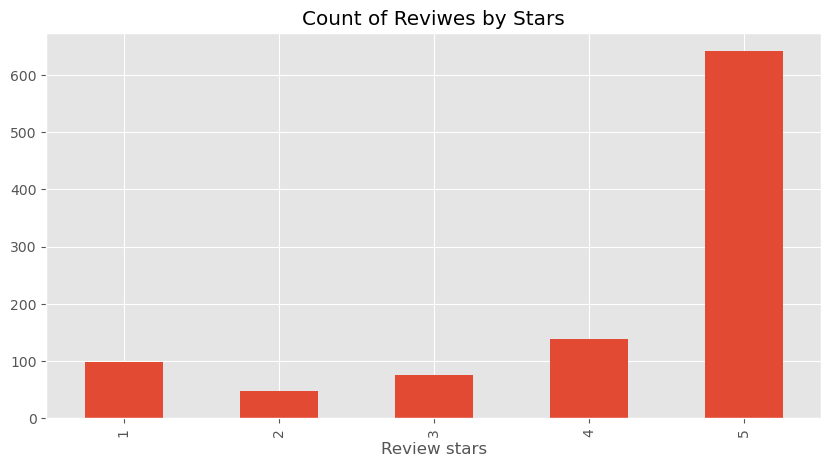

In [9]:
#Lets plot bar graph
ax = df["Score"].value_counts().sort_index().plot(kind='bar', title = "Count of Reviwes by Stars", figsize= (10,5))

ax.set_xlabel("Review stars")
plt.show()


* Most of thew reviews are 5 starts - showing Positive review biased
* 1 star is high comaprtively 2 & 3

# Basic NLTK

In [10]:
example = df["Text"][150]
print(example)

This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!


In [11]:
#split as each words using tokenize
tokens = nltk.word_tokenize(example)
tokens

['This',
 'is',
 'a',
 'fabulous',
 'marinade',
 '!',
 'I',
 'love',
 'to',
 'use',
 'it',
 'for',
 'chicken',
 ',',
 'either',
 'baked',
 'in',
 'the',
 'oven',
 'OR',
 'on',
 'the',
 'grill',
 '.',
 'This',
 'has',
 'enough',
 'flavor',
 '&',
 'flair',
 ',',
 'I',
 "'ve",
 'even',
 'used',
 'it',
 'for',
 'dinner',
 'parties',
 ',',
 'only',
 'to',
 'receive',
 'rave',
 'reviews',
 'from',
 'my',
 'guests',
 '!',
 '!',
 'DEFINITELY',
 'worth',
 'the',
 'price',
 '!',
 'Super',
 'cheap',
 'and',
 'super',
 'easy',
 '!',
 'Love',
 'it',
 '!']

In [12]:
#Check parts of each
tagged = nltk.pos_tag(tokens)

tagged

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('fabulous', 'JJ'),
 ('marinade', 'NN'),
 ('!', '.'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('to', 'TO'),
 ('use', 'VB'),
 ('it', 'PRP'),
 ('for', 'IN'),
 ('chicken', 'NN'),
 (',', ','),
 ('either', 'DT'),
 ('baked', 'VBN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('oven', 'NN'),
 ('OR', 'NNP'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('grill', 'NN'),
 ('.', '.'),
 ('This', 'DT'),
 ('has', 'VBZ'),
 ('enough', 'JJ'),
 ('flavor', 'NN'),
 ('&', 'CC'),
 ('flair', 'NN'),
 (',', ','),
 ('I', 'PRP'),
 ("'ve", 'VBP'),
 ('even', 'RB'),
 ('used', 'VBN'),
 ('it', 'PRP'),
 ('for', 'IN'),
 ('dinner', 'NN'),
 ('parties', 'NNS'),
 (',', ','),
 ('only', 'RB'),
 ('to', 'TO'),
 ('receive', 'VB'),
 ('rave', 'VB'),
 ('reviews', 'NNS'),
 ('from', 'IN'),
 ('my', 'PRP$'),
 ('guests', 'NNS'),
 ('!', '.'),
 ('!', '.'),
 ('DEFINITELY', 'NNP'),
 ('worth', 'IN'),
 ('the', 'DT'),
 ('price', 'NN'),
 ('!', '.'),
 ('Super', 'NNP'),
 ('cheap', 'NN'),
 ('and', 'CC'),
 ('super', 'JJ'),
 ('eas

 The abbrevation belongs to some part of speechg, we can refer these from below examples

https://pythonexamples.org/nltk-pos-tagging/

In [13]:
#let put them into entity

#chunk will take tagged tokens

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  fabulous/JJ
  marinade/NN
  !/.
  I/PRP
  love/VBP
  to/TO
  use/VB
  it/PRP
  for/IN
  chicken/NN
  ,/,
  either/DT
  baked/VBN
  in/IN
  the/DT
  oven/NN
  OR/NNP
  on/IN
  the/DT
  grill/NN
  ./.
  This/DT
  has/VBZ
  enough/JJ
  flavor/NN
  &/CC
  flair/NN
  ,/,
  I/PRP
  've/VBP
  even/RB
  used/VBN
  it/PRP
  for/IN
  dinner/NN
  parties/NNS
  ,/,
  only/RB
  to/TO
  receive/VB
  rave/VB
  reviews/NNS
  from/IN
  my/PRP$
  guests/NNS
  !/.
  !/.
  DEFINITELY/NNP
  worth/IN
  the/DT
  price/NN
  !/.
  Super/NNP
  cheap/NN
  and/CC
  super/JJ
  easy/NN
  !/.
  Love/VB
  it/PRP
  !/.)


# VADER sentiment scoring

VADER (Valence Aware Dictionary and sEntiment Reasone)

The VADER sentiment score is a compound score that ranges from -1 to 1, where:
* A positive score (closer to +1) indicates a positive sentiment.
* A negative score (closer to -1) indicates a negative sentiment
* A score around 0 suggests a neutral sentiment ent.r

By using "bag of words" approch,

* we remove stop words
* each word is scored and combined to a total score

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #progress bar tracker to do loops in the data #progress bar tracker to do loops in the data

In [15]:
sia = SentimentIntensityAnalyzer()

In [16]:
sia.polarity_scores("I am hungry")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [17]:
sia.polarity_scores("I am happy")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [18]:
sia.polarity_scores("I am scared")

{'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.4404}

In [19]:
sia.polarity_scores("what a horrible experince")

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [20]:
sia.polarity_scores("a wonderfull day")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [21]:
sia.polarity_scores("i'm so excited to vist a new place")

{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4005}

In [22]:
example

"This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!"

In [23]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.9858}

Over all compund score giving +ve score

In [24]:
# Run the polirity score on the entire dataset
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [25]:
res = {}
for i,  row in tqdm(df.iterrows(),total = len(df)):
    text = row["Text"]
    myid = row["Id"]
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [26]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [27]:
#lets create dataframe for this
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
996,0.026,0.721,0.253,0.9788
997,0.000,0.786,0.214,0.9309
998,0.000,0.673,0.327,0.9634
999,0.063,0.874,0.062,-0.0129


In [28]:
#now merge to orignal data frame

vaders =  vaders.reset_index().rename(columns={'index':"Id"})

vaders = vaders.merge(df, how='left')

vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [29]:
#Now we ghave sentiment scores wit data
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Plot VADER results

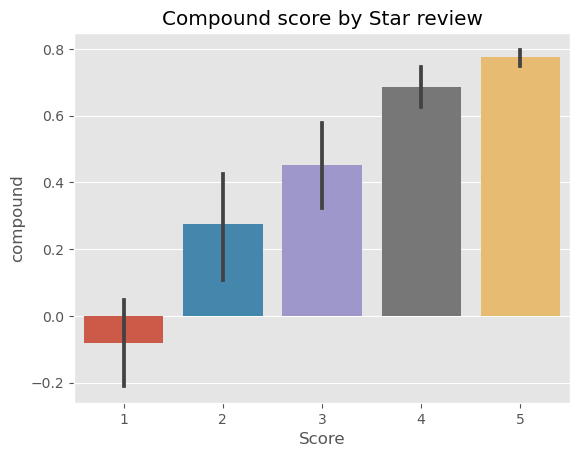

In [30]:
## a score having 5 should be pos and 1 having neg, lets use bar plot

ax = sns.barplot(data=vaders, x="Score", y = "compound")
ax.set_title("Compound score by Star review")
plt.show()

* Compound score is good at 5 rating & worse at 1 star rating

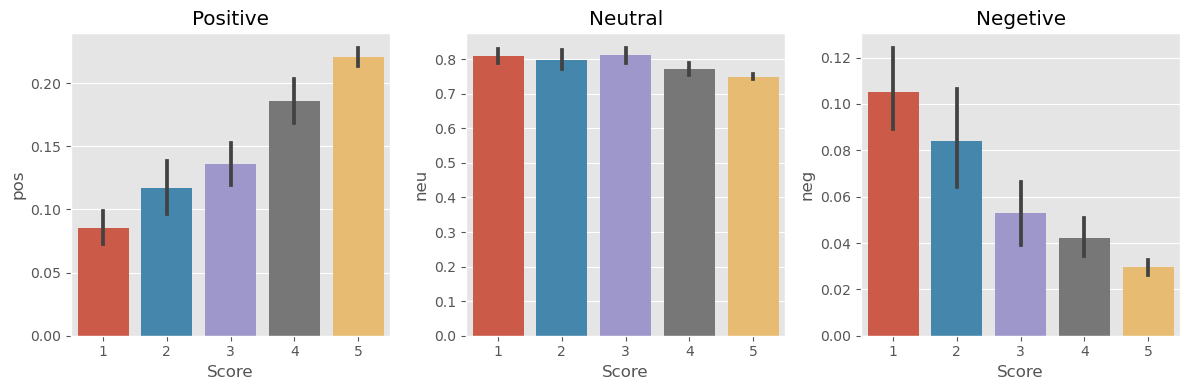

In [31]:
# by the way of pos, neg, neu approch
fig, axs = plt.subplots(1, 3, figsize=(12,4))
sns.barplot(data=vaders, x="Score", y="pos", ax = axs[0])
sns.barplot(data=vaders, x="Score", y="neu", ax = axs[1])
sns.barplot(data=vaders, x="Score", y="neg", ax = axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negetive")
plt.tight_layout()
plt.show()

* In Positive - Positive is incresing from 1 to 5
* In Neutral - There is no such variation as much
* In Negetive - Negtivity decresing from 1 to 5

This shows there is arealtion between customer rating/score and sentiments analysysi done using reviews

# Roberta PreTrained Model

* Use a model trained large corpus data.
* Transformer model account for the words but also the context related to other words.

In [32]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [33]:
#From hugginface we use pretrained model
# we use transform learning 
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [34]:
print(example)

This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!


In [35]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.9858}

In [36]:
##Lets use Roberta model for this

encoded_text = tokenizer(example, return_tensors='pt')

encoded_text

{'input_ids': tensor([[    0,   713,    16,    10, 17545,  4401,   179,  1829,   328,  1437,
            38,   657,     7,   304,    24,    13,  5884,     6,  1169, 17241,
            11,     5, 12941,  6532,    15,     5, 20212,     4,  1437,   152,
            34,   615, 12117,   359, 27456,     6,    38,   348,   190,   341,
            24,    13,  3630,  1799,     6,   129,     7,  1325, 31278,  6173,
            31,   127,  3958, 12846,  5885, 25623,  2068, 29313,   966,     5,
           425,   328,  1582,  6162,     8,  2422,  1365,   328,  3437,    24,
           328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [37]:
model(**encoded_text)

SequenceClassifierOutput(loss=None, logits=tensor([[-2.3346, -0.8617,  4.1159]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [38]:
output = model(**encoded_text)
scores =  output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.00156644, 0.00683209, 0.9916014 ], dtype=float32)

In [39]:
output[0][0]

tensor([-2.3346, -0.8617,  4.1159], grad_fn=<SelectBackward0>)

In [40]:
output[0][0].detach()

tensor([-2.3346, -0.8617,  4.1159])

In [41]:
scores_dict = {
    "roberta_neg":scores[0],
    "roberta_neu": scores[1],
    "roberta_pos": scores[2]
}

scores_dict

{'roberta_neg': 0.0015664414,
 'roberta_neu': 0.006832089,
 'roberta_pos': 0.9916014}

In [42]:
example

"This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!"

In [43]:
# Lets run this on entire dataset

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores =  output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        "roberta_neg":scores[0],
        "roberta_neu": scores[1],
        "roberta_pos": scores[2]
                    }
    return scores_dict
    


In [44]:
polarity_scores_roberta(example)

{'roberta_neg': 0.0015664414,
 'roberta_neu': 0.006832089,
 'roberta_pos': 0.9916014}

In [45]:
res = {}
for i,  row in tqdm(df.iterrows(),total = len(df)):
    try:
        text = row["Text"]
        myid = row["Id"]
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res [myid] = both
    except RuntimeError: #where size of text is too big, model can't handle, skip those
        print(f"Broke for id {myid}")

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [48]:
results_df = pd.DataFrame(res).T
results_df =  results_df.reset_index().rename(columns={'index':"Id"})
results_df = results_df.merge(df, how='left')
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Comapre scores across between models

In [49]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

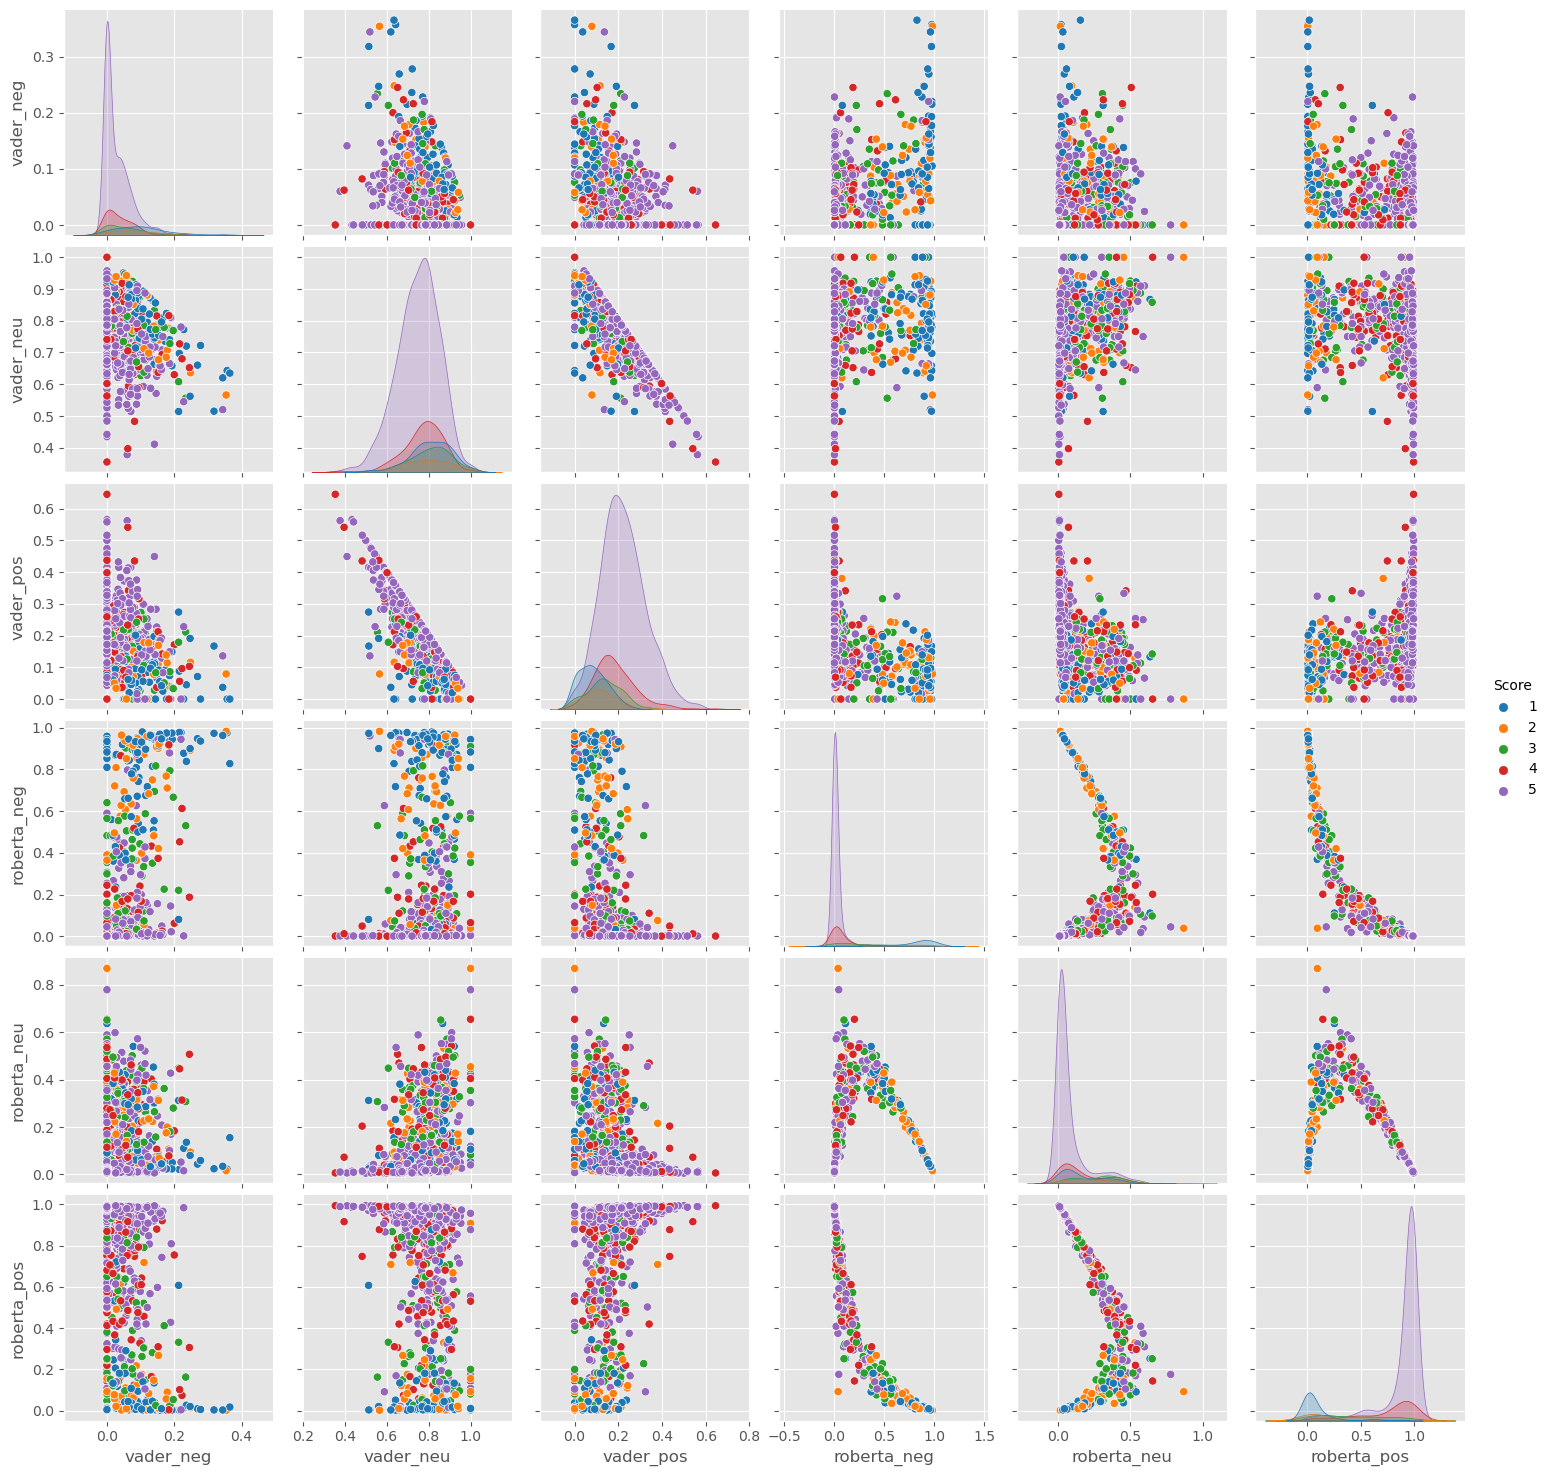

In [54]:
sns.pairplot(data = results_df, vars=[ 'vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], 
            hue = "Score",
            palette='tab10')
plt.show()

showing, tradional methods less confident comparatively roberta model

# Review Few Examples

Example 1: Less rating (1)/ review was not good, but model showing positive score - ( Like False Positive (Type I Error))

In [60]:
results_df.query("Score==1").sort_values("roberta_pos", ascending=False)["Text"].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [61]:
results_df.query("Score==1").sort_values("vader_pos", ascending=False)["Text"].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

Example 2: Good rating (5)/ review was good, but model showing negetive score - ( Like False Negetive (Type II Error))

In [62]:

results_df.query("Score==5").sort_values("roberta_neg", ascending=False)["Text"].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [63]:

results_df.query("Score==5").sort_values("vader_neg", ascending=False)["Text"].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Transformer Pipeline

In [65]:
from transformers import pipeline

sen_pipeline = pipeline("sentiment-analysis")#automatically download embedings and model

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [66]:
sen_pipeline("I Love to treavel")

[{'label': 'POSITIVE', 'score': 0.9991744160652161}]

In [67]:
sen_pipeline("I was scared")

[{'label': 'NEGATIVE', 'score': 0.996921181678772}]

In [68]:
sen_pipeline("this is super cool")

[{'label': 'POSITIVE', 'score': 0.9998654127120972}]

In [69]:
sen_pipeline("nothing to say")

[{'label': 'NEGATIVE', 'score': 0.9993622899055481}]

In [71]:
sen_pipeline("be cool")

[{'label': 'POSITIVE', 'score': 0.9995120763778687}]